#                  Telecom Customer Churn Analysis. 


<img src="https://storage.googleapis.com/kaggle-datasets-images/2321135/3907949/b0bdc9ae114288b030a4c2a74ae4a939/dataset-cover.png?t=2022-07-09-07-22-29"/>

**ABOUT THE DATA.**

The Customer Churn table contains information on all 7,043 customers from a Telecommunications company in California in Q2 2022
Each record represents one customer, and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more!

**Data Collection Methodology**

The public dataset is completely available on the Maven Analytics website platform where it stores and consolidates all available datasets for analysis in the Data Playground. The specific telecom customer churn dataset at hand can be obtained in this link below: https://www.mavenanalytics.io/blog/maven-churn-challenge, also on Kaggle @:https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics.


**OBJECTIVES:**

*Why customers churn? 
*How can you improve customer retention?

**Data validation process:**


*Data Cleaning:*

* Drop "Churn Category and Churn Reason coluumns due to the number of null values in them.
* Fill numerical columns with zero from each column.
* Dropping all observaton with null value in the categorical columns..



## Import neccessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading dataset.
df = pd.read_csv('./cleaned-telecom-data.csv')
df.head()

,Unnamed: 0,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [3]:
print('The data consist of '+str(df.shape[0])+ ' rows and '+str(df.shape[1])+' columns')

The data consist of 4835 rows and 37 columns


## Data Analysis and Visualization.

**1. Exploring why customer churn.** 

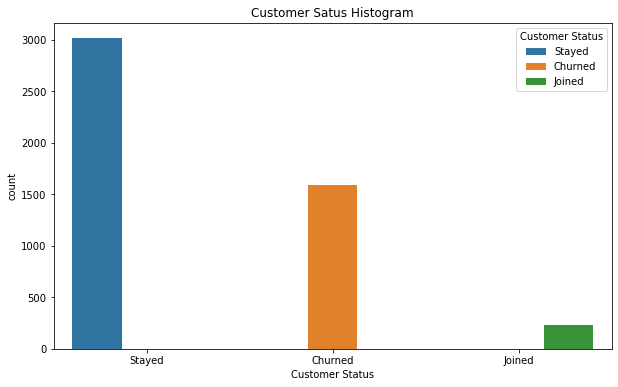

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Customer Status', hue='Customer Status')
plt.title('Customer Satus Histogram')
plt.show()

The data has about 3000 records of *stayed*, 1500 record of *churned* and 200 record of *joined* which is not much of concern with our analysis. Hence the joined status may be drop.

In [5]:
df = df.drop(df[df['Customer Status'] == 'Joined'].index, axis=0)
df['Customer Status'].value_counts()

Stayed     3015
Churned    1586
Name: Customer Status, dtype: int64

In [6]:
churn = df.groupby(['Customer Status']).get_group('Churned')
stayed = df.groupby(['Customer Status']).get_group('Stayed')
# joined = df.groupby(['Customer Status']).get_group('Joined')

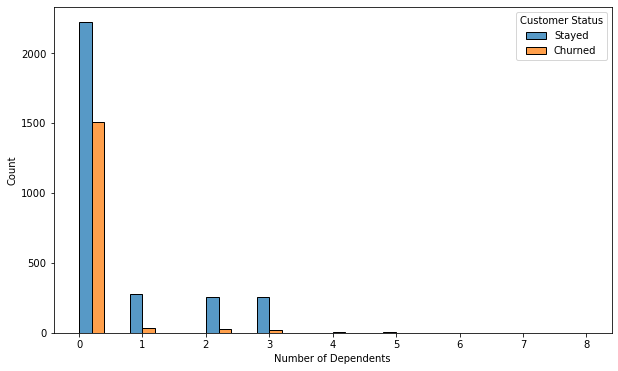

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Number of Dependents', hue='Customer Status', multiple='dodge', stat='count', discrete=False, binwidth=0.4)
plt.show()

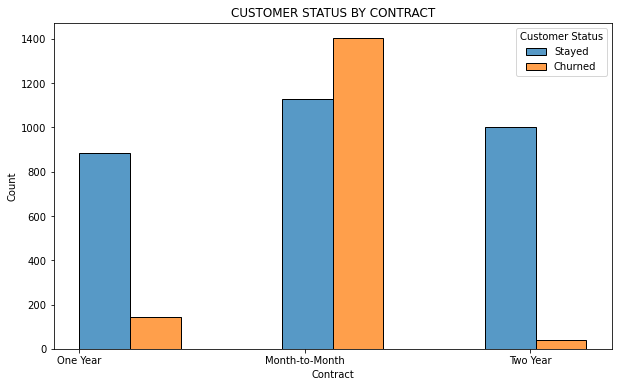

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Contract', hue='Customer Status', multiple='dodge', stat='count', discrete=False, binwidth=0.45)
plt.title('CUSTOMER STATUS BY CONTRACT')
plt.show()

**Insght:** Here is an evident that customer with monthly contract tend to churn more than annual or bi-annual contract.

We need to look further in other factors that can lead to churn in monthly and possibly yearly contract.

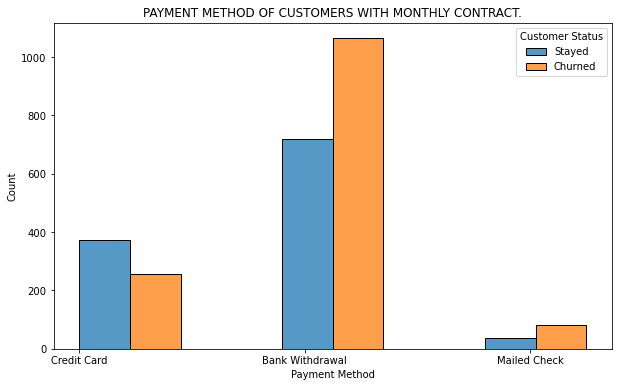

In [9]:
m2m = df[df['Contract'] == 'Month-to-Month']
plt.figure(figsize=(10,6))
sns.histplot(data=m2m, x='Payment Method', hue='Customer Status', multiple='dodge', discrete=False, binwidth=0.45)
plt.title('PAYMENT METHOD OF CUSTOMERS WITH MONTHLY CONTRACT.')
plt.show()

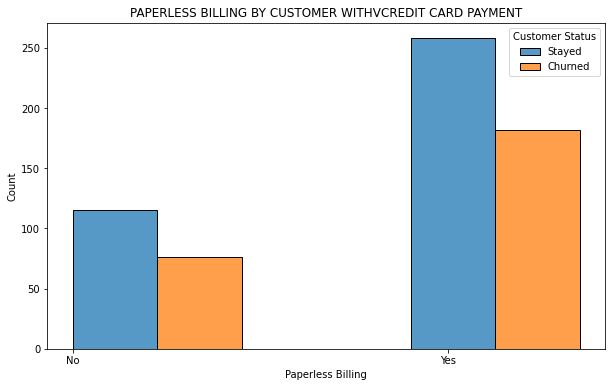

In [10]:
card = m2m[m2m['Payment Method'] == 'Credit Card']

plt.figure(figsize=(10,6))
sns.histplot(data=card, x='Paperless Billing', hue='Customer Status', multiple='dodge', discrete=False, binwidth=0.45)
plt.title('PAPERLESS BILLING BY CUSTOMER WITHVCREDIT CARD PAYMENT')
plt.show()

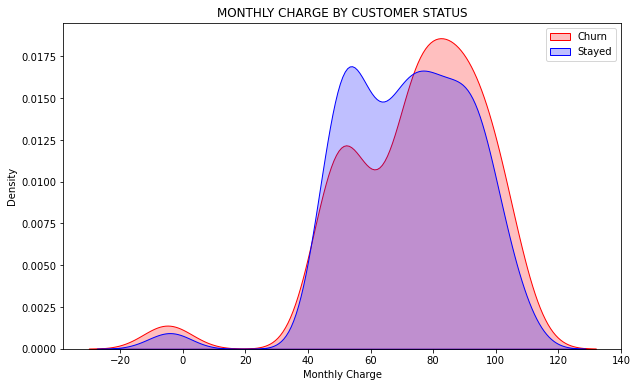

In [11]:
churn_cd = card.groupby(['Customer Status']).get_group('Churned')
stayed_cd = card.groupby(['Customer Status']).get_group('Stayed')

plt.figure(figsize=(10,6))
sns.kdeplot(churn_cd['Monthly Charge'], color='red', shade=True)
sns.kdeplot(stayed_cd['Monthly Charge'], color='blue', shade=True)
plt.title('MONTHLY CHARGE BY CUSTOMER STATUS')
plt.legend(['Churn', 'Stayed'])
plt.ion()

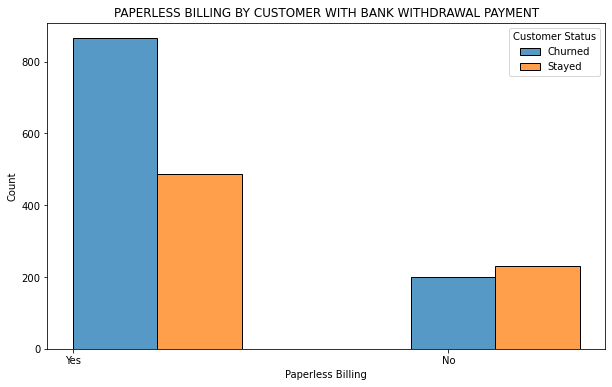

In [12]:
bank = m2m[m2m['Payment Method'] == 'Bank Withdrawal']

plt.figure(figsize=(10,6))
sns.histplot(data=bank, x='Paperless Billing', hue='Customer Status', multiple='dodge', discrete=False, binwidth=0.45)
plt.title('PAPERLESS BILLING BY CUSTOMER WITH BANK WITHDRAWAL PAYMENT')
plt.show()

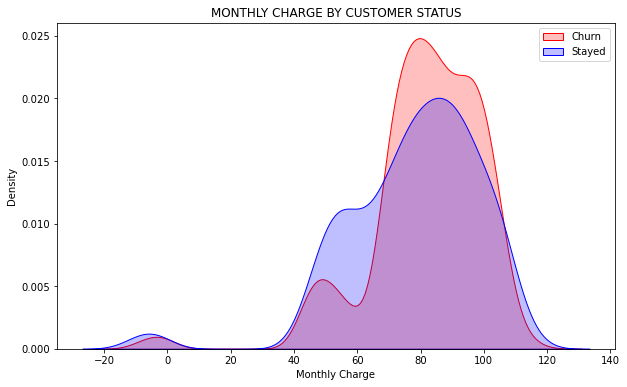

In [13]:
churn_bk = bank.groupby(['Customer Status']).get_group('Churned')
stayed_bk = bank.groupby(['Customer Status']).get_group('Stayed')

plt.figure(figsize=(10,6))
sns.kdeplot(churn_bk['Monthly Charge'], color='red', shade=True)
sns.kdeplot(stayed_bk['Monthly Charge'], color='blue', shade=True)
plt.title('MONTHLY CHARGE BY CUSTOMER STATUS')
plt.legend(['Churn', 'Stayed'])
plt.ion()

Customer churn are more likely to increase as *Monthly Charge* increases, which cause customer to switch service provider.

Another factor to consider from the above insight is service quality and reliability.

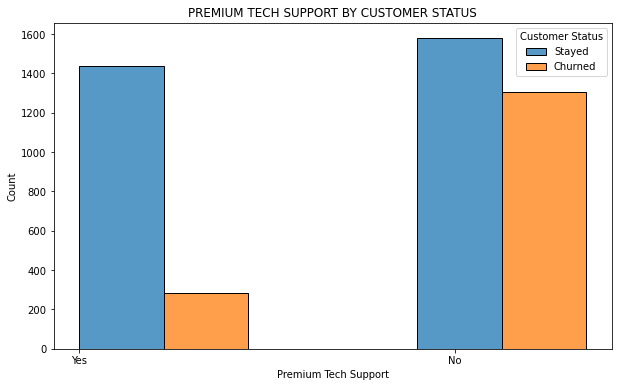

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Premium Tech Support', hue='Customer Status', multiple='dodge', discrete=False, binwidth=0.45)
plt.title('PREMIUM TECH SUPPORT BY CUSTOMER STATUS')
plt.show()

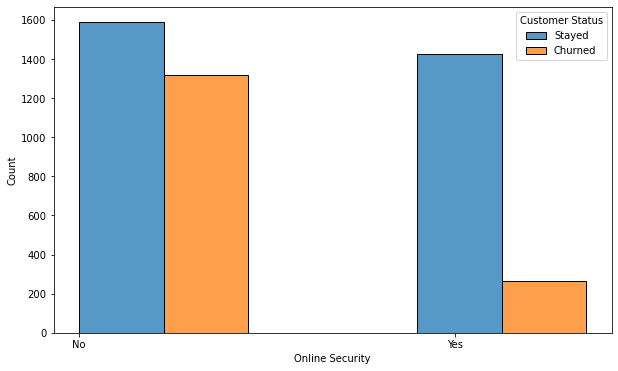

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Online Security', hue='Customer Status', multiple='dodge', discrete=False, binwidth=0.45)
plt.show()

**Key Insights**

The factors that contribute to customer churn are:

* Contract type-> customers with long time contract are less likely to churn

* Monthly Charge-> there is high churn rate at hight service charge.

* Preminm Tech Support-> customer with service that has *NO* technology support such as network coverage has high chance of churning.

*  Online Security-> 

**2. How to improve customer retention**



In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(churn['Tenure in Months'], color='red', shade=True)
sns.kdeplot(stayed['Tenure in Months'], color='blue', shade=True)
plt.title('Customer Tenure in Months')
plt.legend(['Churn', 'Stayed'])
plt.ion()plt.figure(figsize=(10,6))
sns.kdeplot(churn['Tenure in Months'], color='red', shade=True)
sns.kdeplot(stayed['Tenure in Months'], color='blue', shade=True)
plt.title('Customer Tenure in Months')
plt.legend(['Churn', 'Stayed'])
plt.ion()

SyntaxError: invalid syntax (<ipython-input-16-2d306c7b3251>, line 6)

The longer the contract duration by customer the less likely it is to churn.
Next we are going to look into what can improve customer retention

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='Offer', hue='Customer Status', multiple='dodge', stat='count', discrete=False, binwidth=0.45)
plt.title('OFFERS BY CUSTOMER STATUS')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(churn['Total Revenue'], color='red', shade=True)
sns.kdeplot(stayed['Total Revenue'], color='blue', shade=True)
plt.title('Total Revenue By Customer')
plt.legend(['Churn', 'Stayed'])
plt.ion()

**Recommendations:**
* Provision of service/product of many varieties and less charges

* Investing in cutting edge technology and availability of service in both rural and urban environment.

* Improve in online security, which will make customer reliable in term of their privacy.

* Innovation of mobile payment platform for customer to subcribe on the go.

**Conclusion:**

There is need for futher analysis to provide more solution to the problem byacquiring more data.

The data can also be use to make predictive analysis in order to give decision maker a brief overview of each customer.